In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the transactions data from the sales data

trans=pd.read_excel(r'C:\Users\Data\ecommerce_Sales_data.xlsx', "Transaction Values")
trans.head()

,Dates,time,value
0,2006-01-04,09:48:00,1088
1,2006-01-09,05:40:00,3891
2,2006-01-13,07:09:00,2205
3,2006-01-13,10:47:00,352
4,2006-01-16,11:01:00,3206


In [3]:
# We will first check the datatype of the variables as we are dealing with date time 

trans.dtypes

Dates    datetime64[ns]
time             object
value             int64
dtype: object

In [4]:
# Since time is an "object" type, we need to convert it into "datetime" format
import datetime

trans["time"]=pd.to_datetime(trans["time"], format="%H:%M:%S")

In [5]:
# We will check the dtype for the time column again to see if it got converted

trans.dtypes

Dates    datetime64[ns]
time     datetime64[ns]
value             int64
dtype: object

In [6]:
trans["time"].dt.hour

0       9
1       5
2       7
3      10
4      11
       ..
994    17
995    23
996     4
997    10
998    16
Name: time, Length: 999, dtype: int64

In [7]:
# Computing gap between the current and previous transaction

trans["gap"]=trans["Dates"].diff().dt.days
trans

,Dates,time,value,gap
0,2006-01-04,1900-01-01 09:48:00,1088,NaN
1,2006-01-09,1900-01-01 05:40:00,3891,5.0
2,2006-01-13,1900-01-01 07:09:00,2205,4.0
3,2006-01-13,1900-01-01 10:47:00,352,0.0
4,2006-01-16,1900-01-01 11:01:00,3206,3.0
...,...,...,...,...
994,2013-12-12,1900-01-01 17:37:00,3640,9.0
995,2013-12-20,1900-01-01 23:24:00,2065,8.0
996,2013-12-25,1900-01-01 04:47:00,3287,5.0
997,2013-12-26,1900-01-01 10:32:00,3073,1.0


In [8]:
# Computing the Day, hour and week of transactions

trans["day"] = trans["Dates"].dt.day
trans["hour"]= trans["time"].dt.hour
trans["week"]= trans["Dates"].dt.week
trans      

,Dates,time,value,gap,day,hour,week
0,2006-01-04,1900-01-01 09:48:00,1088,NaN,4,9,1
1,2006-01-09,1900-01-01 05:40:00,3891,5.0,9,5,2
2,2006-01-13,1900-01-01 07:09:00,2205,4.0,13,7,2
3,2006-01-13,1900-01-01 10:47:00,352,0.0,13,10,2
4,2006-01-16,1900-01-01 11:01:00,3206,3.0,16,11,3
...,...,...,...,...,...,...,...
994,2013-12-12,1900-01-01 17:37:00,3640,9.0,12,17,50
995,2013-12-20,1900-01-01 23:24:00,2065,8.0,20,23,51
996,2013-12-25,1900-01-01 04:47:00,3287,5.0,25,4,52
997,2013-12-26,1900-01-01 10:32:00,3073,1.0,26,10,52


In [9]:
# We want to look at 2013 January data. First we need the Datetime index

trans.set_index("Dates", inplace=True)

In [10]:
# the index is DateTimeIndex

trans.index

DatetimeIndex(['2006-01-04', '2006-01-09', '2006-01-13', '2006-01-13',
               '2006-01-16', '2006-01-26', '2006-01-31', '2006-02-01',
               '2006-02-05', '2006-02-06',
               ...
               '2013-11-16', '2013-11-18', '2013-11-21', '2013-11-22',
               '2013-12-03', '2013-12-12', '2013-12-20', '2013-12-25',
               '2013-12-26', '2013-12-30'],
              dtype='datetime64[ns]', name='Dates', length=999, freq=None)

In [11]:
trans

,time,value,gap,day,hour,week
Dates,,,,,,
2006-01-04,1900-01-01 09:48:00,1088,NaN,4,9,1
2006-01-09,1900-01-01 05:40:00,3891,5.0,9,5,2
2006-01-13,1900-01-01 07:09:00,2205,4.0,13,7,2
2006-01-13,1900-01-01 10:47:00,352,0.0,13,10,2
2006-01-16,1900-01-01 11:01:00,3206,3.0,16,11,3
...,...,...,...,...,...,...
2013-12-12,1900-01-01 17:37:00,3640,9.0,12,17,50
2013-12-20,1900-01-01 23:24:00,2065,8.0,20,23,51
2013-12-25,1900-01-01 04:47:00,3287,5.0,25,4,52


In [12]:
trans["2013-01"]

,time,value,gap,day,hour,week
Dates,,,,,,
2013-01-03,1900-01-01 05:42:00,1976,3.0,3,5,1
2013-01-03,1900-01-01 17:57:00,3057,0.0,3,17,1
2013-01-03,1900-01-01 19:59:00,922,0.0,3,19,1
2013-01-05,1900-01-01 23:25:00,607,2.0,5,23,1
2013-01-08,1900-01-01 22:39:00,1388,3.0,8,22,2
2013-01-09,1900-01-01 23:44:00,1593,1.0,9,23,2
2013-01-11,1900-01-01 12:57:00,3207,2.0,11,12,2
2013-01-13,1900-01-01 15:49:00,2854,2.0,13,15,2
2013-01-20,1900-01-01 07:31:00,2757,7.0,20,7,3


In [13]:
# Average value in Feb 2013

trans["2013-02"].value.mean()

2829.0

In [14]:
# Average value in the 1st week of 2013

trans["2013-01-01":"2013-01-07"].value.mean()

1640.5

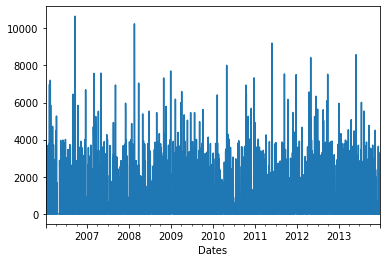

In [15]:
# Plotting the sum of Day wise values 

trans["value"].resample("D").sum().plot(kind="line")

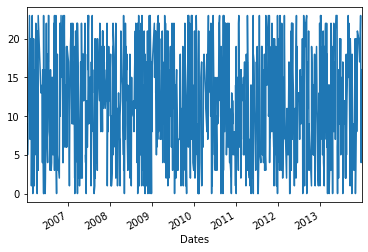

In [16]:
# Plotting the hours

trans["hour"].plot()

In [30]:
# Computing the ratio of transaction value and the gap between current and previous transaction

trans["ratio"]=round(trans["value"]/trans["gap"],2)
trans

,time,value,gap,day,hour,week,c,ratio
Dates,,,,,,,,
2006-01-04,1900-01-01 09:48:00,1088,NaN,4,9,1,1088,NaN
2006-01-09,1900-01-01 05:40:00,3891,5.0,9,5,2,3891,778.20
2006-01-13,1900-01-01 07:09:00,2205,4.0,13,7,2,2557,551.25
2006-01-13,1900-01-01 10:47:00,352,0.0,13,10,2,2557,inf
2006-01-16,1900-01-01 11:01:00,3206,3.0,16,11,3,3206,1068.67
...,...,...,...,...,...,...,...,...
2013-12-12,1900-01-01 17:37:00,3640,9.0,12,17,50,3640,404.44
2013-12-20,1900-01-01 23:24:00,2065,8.0,20,23,51,2065,258.12
2013-12-25,1900-01-01 04:47:00,3287,5.0,25,4,52,3287,657.40


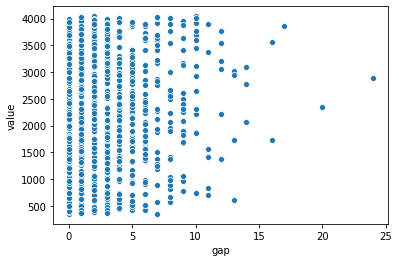

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(x=trans["gap"], y=trans["value"])

We can observe that it doesnt happen that if gap was higher people will do high amount of transaction to make average buying per day constant. That doesn't happen. More regular the customer , higher amount of purchases they make.

In [20]:
# Importing Sales data
import pandas as pd

sales=pd.read_excel(r'C:\Users\Data\ecommerce_Sales_data.xlsx', "Sales data")
s1=pd.read_excel(r'C:\Users\Data\ecommerce_Sales_data.xlsx', "Sales data")
sales.head()

,Product,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Category
0,Tshirt,221100,218900,55000,66000,64350,105050,241450,157300,190300,270600,Clothes
1,SportShoes,228000,218400,219600,232800,,219600,,128400,190800,166800,Accessories
2,Shirt,138400,,364000,91200,,163200,136800,250400,323200,363200,Clothes
3,LeatherShoes,156000,276000,231000,295500,294000,265500,166500,,282000,222000,Accessories
4,Bags,109200,186200,182000,158200,137200,200200,74200,98000,71400,200200,Accessories


In [21]:
# Creating a function which will impute all the missing values to be the median sales

sales.set_index("Product", inplace=True)

In [22]:
sales.head()

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Category
Product,,,,,,,,,,,
Tshirt,221100,218900,55000,66000,64350,105050,241450,157300,190300,270600,Clothes
SportShoes,228000,218400,219600,232800,,219600,,128400,190800,166800,Accessories
Shirt,138400,,364000,91200,,163200,136800,250400,323200,363200,Clothes
LeatherShoes,156000,276000,231000,295500,294000,265500,166500,,282000,222000,Accessories
Bags,109200,186200,182000,158200,137200,200200,74200,98000,71400,200200,Accessories


In [5]:
sales.dtypes

Week1       object
Week2       object
Week3       object
Week4       object
Week5       object
Week6       object
Week7       object
Week8       object
Week9       object
Week10      object
Category    object
dtype: object

In [23]:
# Since our df contains missing values, we need to impute the same. We can impute with Median but since there are blank values here
# we need to fill it out with np.nan for further calculations

import numpy as np

for i in sales.index:
    for j in sales.columns:
        if sales.loc[i,j]==" ":
            sales.loc[i,j]=np.nan
            




In [24]:
sales

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Category
Product,,,,,,,,,,,
Tshirt,221100,218900,55000,66000,64350,105050,241450,157300,190300,270600,Clothes
SportShoes,228000,218400,219600,232800,NaN,219600,NaN,128400,190800,166800,Accessories
Shirt,138400,NaN,364000,91200,NaN,163200,136800,250400,323200,363200,Clothes
LeatherShoes,156000,276000,231000,295500,294000,265500,166500,NaN,282000,222000,Accessories
Bags,109200,186200,182000,158200,137200,200200,74200,98000,71400,200200,Accessories
Wallets,46360,72960,107920,50920,60040,82840,90440,NaN,133000,NaN,Accessories
Keyrings,13800,26100,4200,29250,9600,6600,19050,24750,27900,3900,Accessories
Jeans,174900,528000,327800,518100,380600,157300,343200,425700,356400,191400,Clothes
Trousers,200400,136800,262800,148800,528000,NaN,NaN,175200,440400,573600,Clothes


In [25]:
sales.drop(columns="Category", inplace=True)

In [26]:
# Median values are easily calculated in columns hence transposing the data sets to get the product data in columns

sales=sales.transpose()

In [27]:
sales=sales.fillna(sales.median())
sales

Product,Tshirt,SportShoes,Shirt,LeatherShoes,Bags,Wallets,Keyrings,Jeans,Trousers,Shorts,...,Coolingpads,DigitalPen,GoogleGlass,SmartWatch,Books,ebooks,Notebooks,Pens,Cards,Drawingsets
Week1,221100,228000.0,138400.0,156000.0,109200,46360.0,13800,174900,200400.0,74480.0,...,6000.0,14400.0,90000,445000.0,719600.0,170200,31120,15930,8600.0,201600.0
Week2,218900,218400.0,206800.0,276000.0,186200,72960.0,26100,528000,136800.0,255920.0,...,15000.0,9600.0,70000,275000.0,746800.0,128900,30640,18630,13525.0,210000.0
Week3,55000,219600.0,364000.0,231000.0,182000,107920.0,4200,327800,262800.0,179200.0,...,17000.0,12000.0,80000,190000.0,752000.0,197300,43280,11520,15000.0,206400.0
Week4,66000,232800.0,91200.0,295500.0,158200,50920.0,29250,518100,148800.0,189840.0,...,12000.0,4000.0,30000,170000.0,720800.0,147500,22240,9630,8350.0,153600.0
Week5,64350,219000.0,206800.0,294000.0,137200,60040.0,9600,380600,528000.0,189840.0,...,15000.0,12800.0,70000,330000.0,707600.0,106500,38320,19710,11275.0,171000.0
Week6,105050,219600.0,163200.0,265500.0,200200,82840.0,6600,157300,231600.0,236320.0,...,15000.0,12000.0,80000,430000.0,726400.0,260500,21920,14490,10750.0,64800.0
Week7,241450,219000.0,136800.0,166500.0,74200,90440.0,19050,343200,231600.0,275520.0,...,16500.0,10400.0,40000,410000.0,719600.0,284400,36800,18900,10750.0,188400.0
Week8,157300,128400.0,250400.0,265500.0,98000,77900.0,24750,425700,175200.0,169680.0,...,22000.0,13600.0,30000,125000.0,400400.0,253700,35040,12510,10300.0,141600.0
Week9,190300,190800.0,323200.0,282000.0,71400,133000.0,27900,356400,440400.0,272160.0,...,10000.0,13600.0,30000,330000.0,627200.0,288300,32240,14850,6300.0,117600.0
Week10,270600,166800.0,363200.0,222000.0,200200,77900.0,3900,191400,573600.0,143920.0,...,15000.0,12000.0,50000,405000.0,524400.0,278500,47440,14670,12050.0,171000.0


In [28]:
# getting the original df back 

sales1=sales.transpose()

Missing values have been replaced by the median values

In [29]:
sales1

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10
Product,,,,,,,,,,
Tshirt,221100.0,218900.0,55000.0,66000.0,64350.0,105050.0,241450.0,157300.0,190300.0,270600.0
SportShoes,228000.0,218400.0,219600.0,232800.0,219000.0,219600.0,219000.0,128400.0,190800.0,166800.0
Shirt,138400.0,206800.0,364000.0,91200.0,206800.0,163200.0,136800.0,250400.0,323200.0,363200.0
LeatherShoes,156000.0,276000.0,231000.0,295500.0,294000.0,265500.0,166500.0,265500.0,282000.0,222000.0
Bags,109200.0,186200.0,182000.0,158200.0,137200.0,200200.0,74200.0,98000.0,71400.0,200200.0
Wallets,46360.0,72960.0,107920.0,50920.0,60040.0,82840.0,90440.0,77900.0,133000.0,77900.0
Keyrings,13800.0,26100.0,4200.0,29250.0,9600.0,6600.0,19050.0,24750.0,27900.0,3900.0
Jeans,174900.0,528000.0,327800.0,518100.0,380600.0,157300.0,343200.0,425700.0,356400.0,191400.0
Trousers,200400.0,136800.0,262800.0,148800.0,528000.0,231600.0,231600.0,175200.0,440400.0,573600.0


In [12]:
# Creating an input button which given a product name prints summary statistics for the same across all weeks. Summary statistics required here are mean, max, min, median, standard deviation.
# Input for the macro :product name

a=input()


sales[a].describe()

Tshirt


count        10.000000
mean     159005.000000
std       80975.844992
min       55000.000000
25%       75762.500000
50%      173800.000000
75%      220550.000000
max      270600.000000
Name: Tshirt, dtype: float64

In [30]:
# We need the Category column back for further analysis

s1.set_index("Product", inplace=True)

In [31]:
d=s1["Category"]

In [32]:
new=pd.concat([sales1,d], axis=1)

In [33]:
new.head()

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Category
Product,,,,,,,,,,,
Tshirt,221100.0,218900.0,55000.0,66000.0,64350.0,105050.0,241450.0,157300.0,190300.0,270600.0,Clothes
SportShoes,228000.0,218400.0,219600.0,232800.0,219000.0,219600.0,219000.0,128400.0,190800.0,166800.0,Accessories
Shirt,138400.0,206800.0,364000.0,91200.0,206800.0,163200.0,136800.0,250400.0,323200.0,363200.0,Clothes
LeatherShoes,156000.0,276000.0,231000.0,295500.0,294000.0,265500.0,166500.0,265500.0,282000.0,222000.0,Accessories
Bags,109200.0,186200.0,182000.0,158200.0,137200.0,200200.0,74200.0,98000.0,71400.0,200200.0,Accessories


In [44]:
# Creating a button which creates binary dummy variable for any given category for this particular data. 
# Input for the button would be the variable name


a=input()

dummy=pd.get_dummies(new[a], drop_first=True, prefix="rating")

dummy

Category


,rating_Clothes,rating_Computers,rating_Electronics,rating_Phone,rating_book
Product,,,,,
Tshirt,1,0,0,0,0
SportShoes,0,0,0,0,0
Shirt,1,0,0,0,0
LeatherShoes,0,0,0,0,0
Bags,0,0,0,0,0
Wallets,0,0,0,0,0
Keyrings,0,0,0,0,0
Jeans,1,0,0,0,0
Trousers,1,0,0,0,0
